In [134]:
source('../../NMEG_utils/r_functions/load_nmeg.r')

In [135]:
seg <- daily_to_xts(get_daily_file('Seg', make_new=FALSE))
ses <- daily_to_xts(get_daily_file('Ses', make_new=FALSE))
wjs <- daily_to_xts(get_daily_file('Wjs', make_new=FALSE))
mpj <- daily_to_xts(get_daily_file('Mpj', make_new=FALSE))
vcp <- daily_to_xts(get_daily_file('Vcp', make_new=FALSE))
vcm <- daily_to_xts(get_daily_file('Vcm', make_new=FALSE))

In [136]:
# Load packages for calculating SPEI
# This package is on CRAN (https://cran.r-project.org/web/packages/SPEI/index.html)
# Website for the project is http://sac.csic.es/spei/index.html
#install.packages('SPEI')
library('SPEI')

In [137]:
get_spei <- function(df_t, numweeks, sitename='SPEI site', plot=TRUE){
    site_cwdiff <- (apply.weekly(df_t$P_F, FUN=sum) - 
                           apply.weekly(df_t$PET_F_mm_daytime, FUN=sum))
    colnames(site_cwdiff) <- paste(sitename, 'cwdiff', sep='_')
    # Not sure if this works - similar to the "SPEI" value Dan once calculated...
    #site_cwdiff$cwdiff_scaled <- (site_cwdiff$cwdiff / 
    #                              apply.weekly(df_t$PET_F_mm_daytime, FUN=sum))
    site_spei <- spei(site_cwdiff, numweeks, na.rm=TRUE)
    if (plot==TRUE){
        plot(site_spei, main=NULL)
        #title(main=title)
    }
    
    site_cwdiff$spei <- as.vector(site_spei$fitted)
    return(site_cwdiff)
}

#seg_cwdiff_m <- apply.monthly(seg$P_F, FUN=sum) - apply.monthly(seg$PET_F_mm_daytime, FUN=sum)

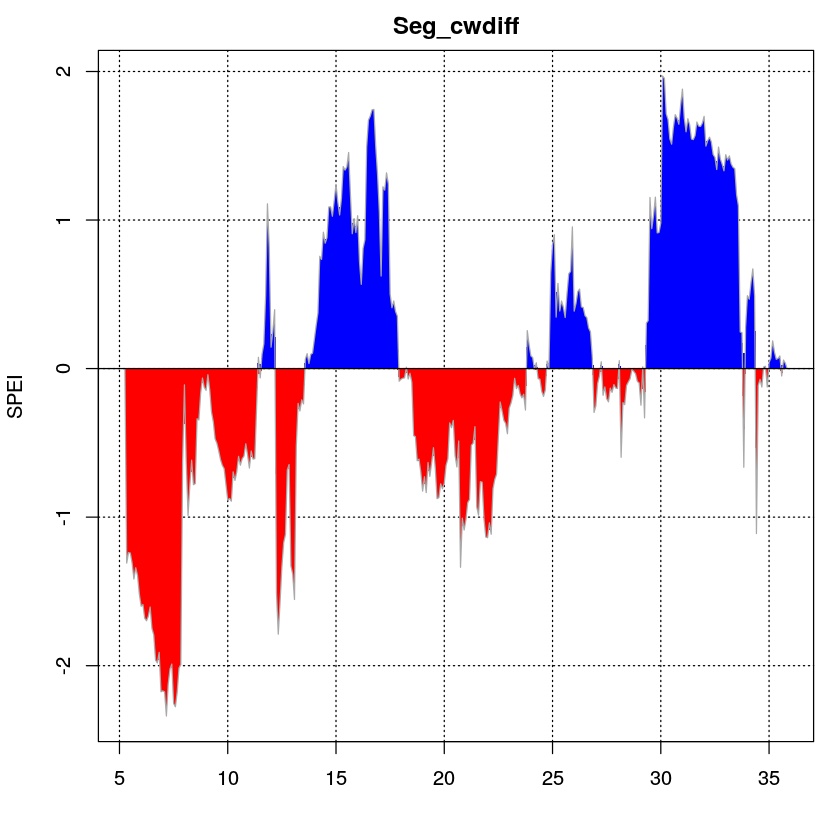

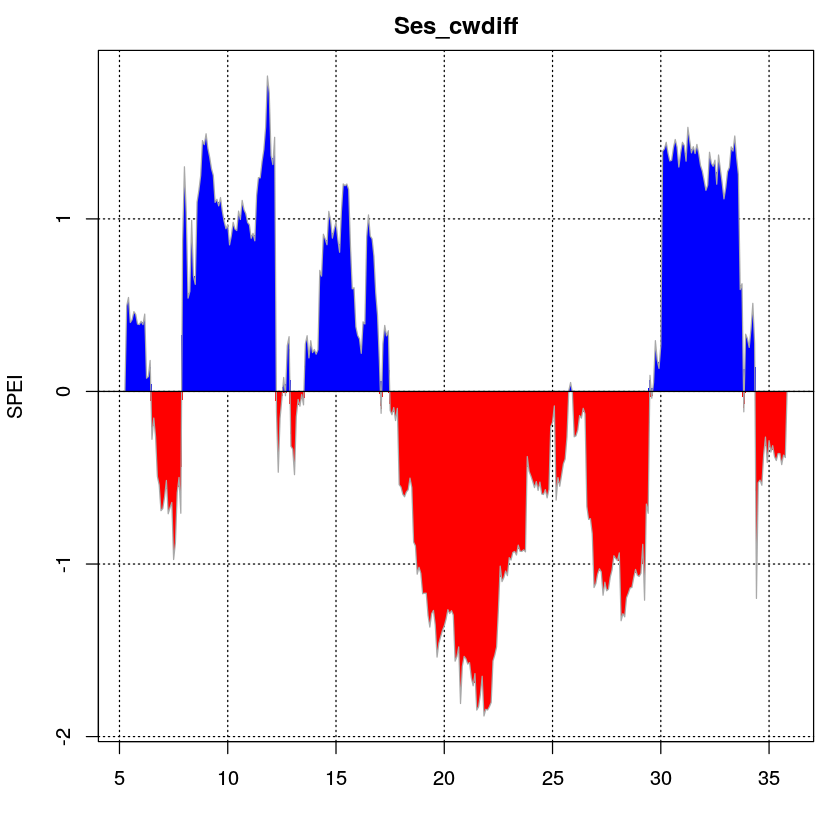

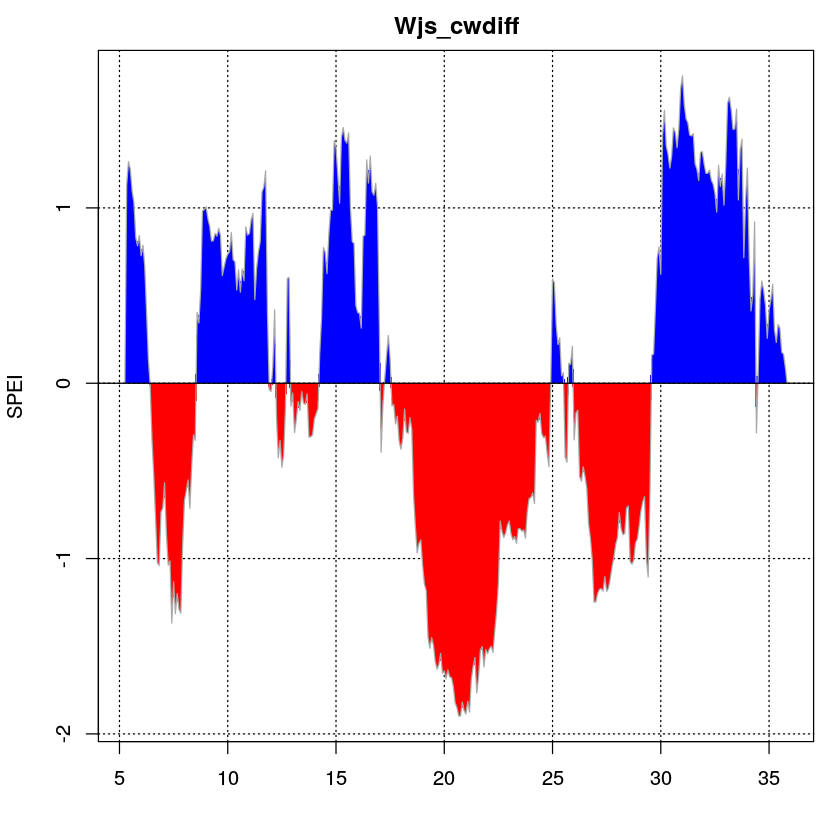

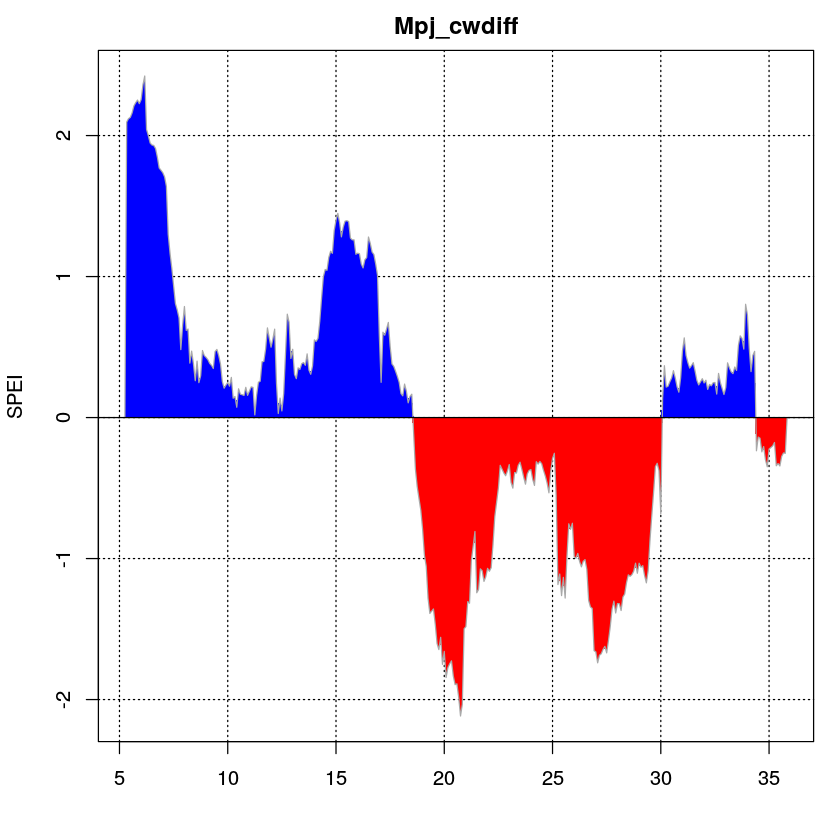

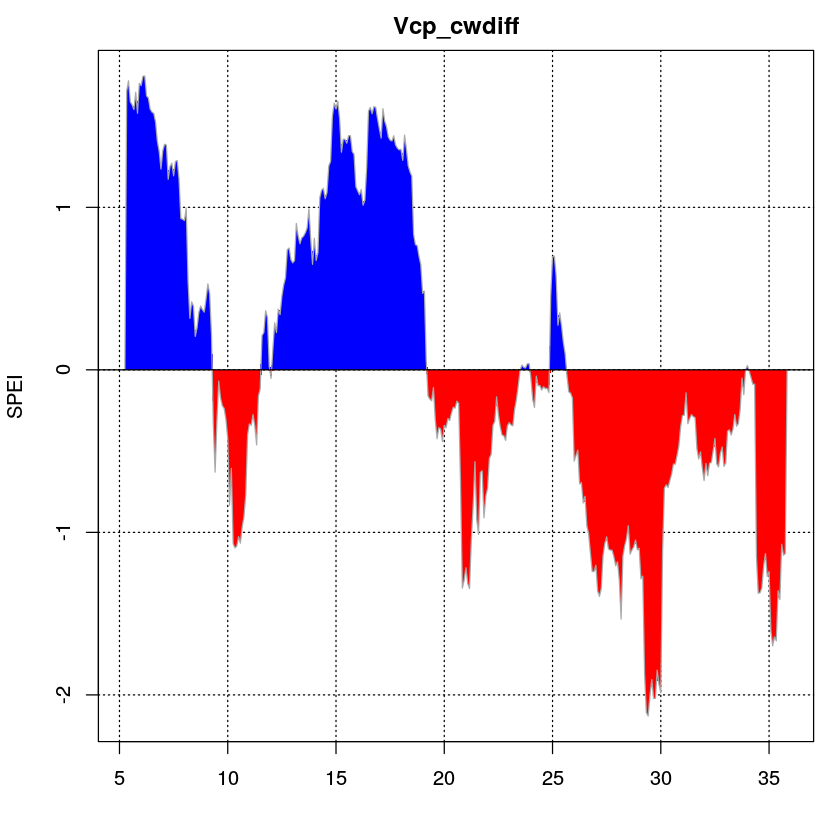

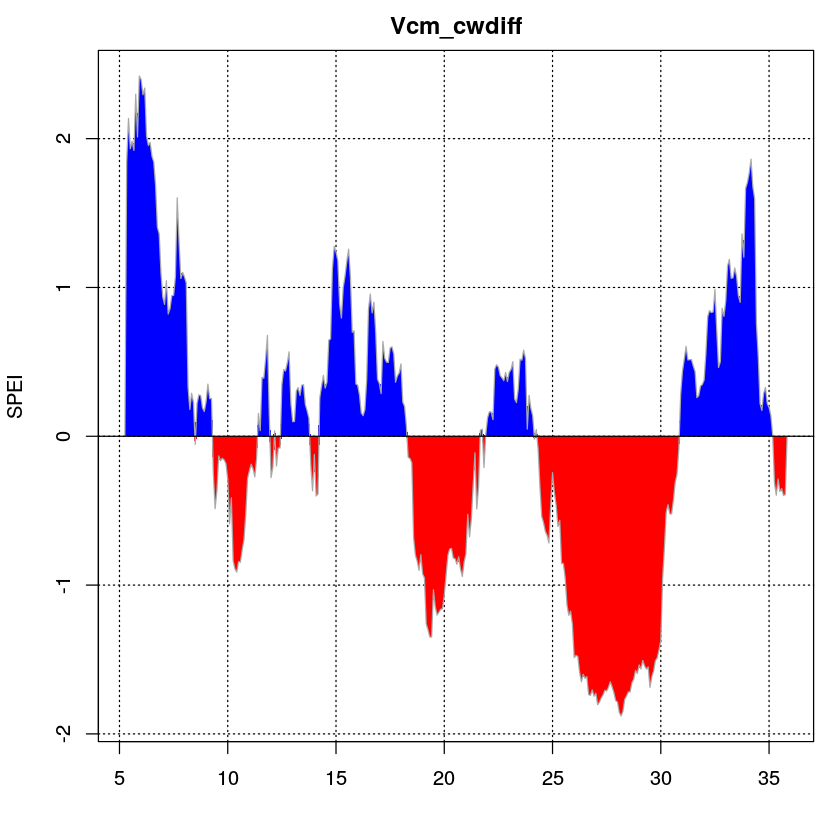

In [138]:
spei <- get_spei(seg, 52, sitename='Seg')[,2]
colnames(spei) <- 'Seg'
spei$Ses <- get_spei(ses, 52, sitename='Ses')[,2]
spei$Wjs <- get_spei(wjs, 52, sitename='Wjs')[,2]
spei$Mpj <- get_spei(mpj, 52, sitename='Mpj')[,2]
spei$Vcp <- get_spei(vcp, 52, sitename='Vcp')[,2]
spei$Vcm <- get_spei(vcm, 52, sitename='Vcm')[,2]

In [139]:
tail(spei)

                   Seg        Ses        Wjs        Mpj       Vcp        Vcm
2014-11-30  0.06247588 -0.4002071 0.23265087 -0.3419421 -1.667397 -0.3961653
2014-12-07  0.06881040 -0.3596623 0.33545725 -0.3260008 -1.359335 -0.2871378
2014-12-14  0.08489962 -0.3599160 0.31404666 -0.3433388 -1.413287 -0.3714823
2014-12-21 -0.05001692 -0.4239753 0.17769028 -0.2754743 -1.073118 -0.3515367
2014-12-28  0.05733375 -0.3688339 0.16626064 -0.2507949 -1.140933 -0.3987029
2014-12-31  0.03684884 -0.3828777 0.09052626 -0.2537966 -1.130137 -0.3910463

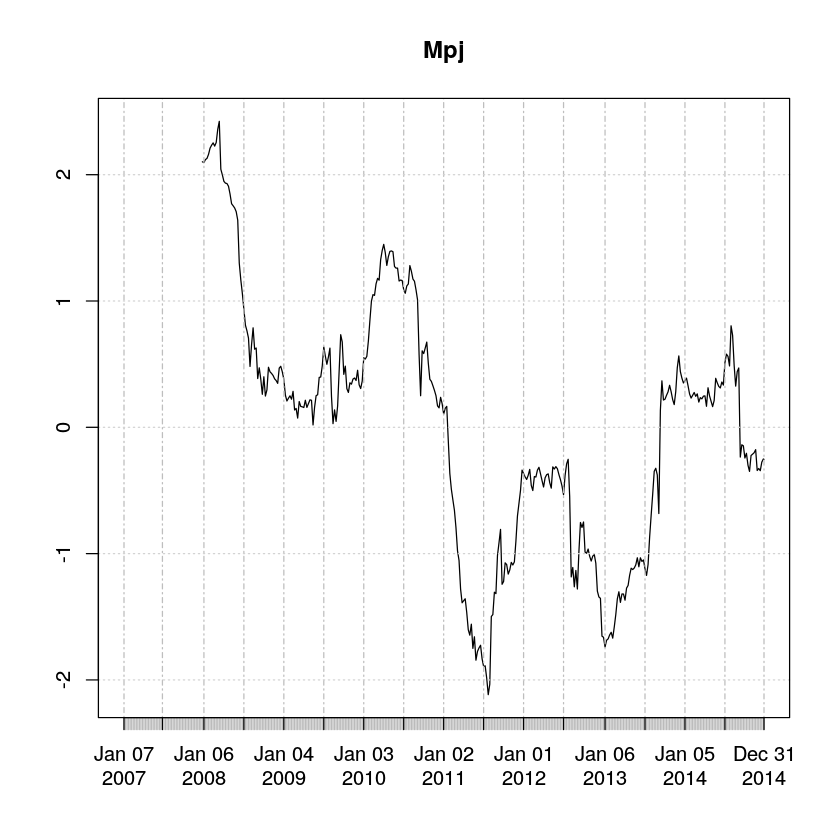

In [140]:
plot(spei$Mpj, main='Mpj')
write.zoo(spei, file='../../NMEG_utils/processed_data/SPEI_12mo_allsites.csv', sep=",")